<a href="https://colab.research.google.com/github/laisOmena/data-science-Alura/blob/master/Introdu%C3%A7%C3%A3o_a_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisando algumas notas em geral


In [2]:
#importando pandas e arquivo csv
import pandas as pd

notas = pd.read_csv("ratings.csv")
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
notas.shape

(100836, 4)

In [4]:
#modificando o nome das colunas
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
notas['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
5         3.0
6         5.0
7         4.0
8         5.0
9         5.0
10        5.0
11        5.0
12        3.0
13        5.0
14        4.0
15        5.0
16        3.0
17        3.0
18        5.0
19        4.0
20        4.0
21        5.0
22        4.0
23        3.0
24        4.0
25        5.0
26        4.0
27        3.0
28        5.0
29        4.0
         ... 
100806    3.0
100807    4.0
100808    4.0
100809    3.5
100810    3.5
100811    5.0
100812    4.5
100813    4.0
100814    5.0
100815    3.5
100816    3.5
100817    3.0
100818    3.0
100819    3.0
100820    2.5
100821    4.5
100822    3.0
100823    3.0
100824    4.0
100825    4.0
100826    3.5
100827    3.5
100828    3.5
100829    5.0
100830    4.0
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [6]:
#descobrindo quais os valores utilizados para as notas
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [7]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [8]:
notas['nota'].mean()

3.501556983616962

In [9]:
#exibindo as cinco primeiras notas
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

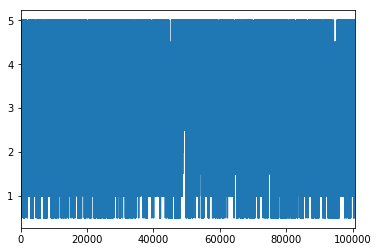

In [10]:
notas.nota.plot()

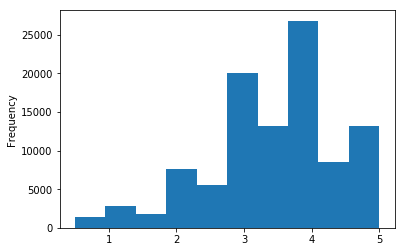

In [11]:
notas.nota.plot(kind = 'hist')

In [12]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

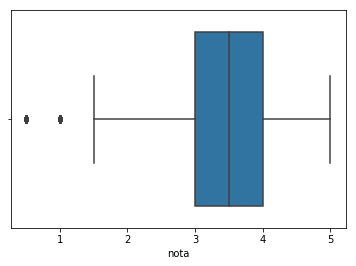

In [13]:
#importando o seaborn
import seaborn as sns

sns.boxplot(notas.nota)

In [14]:
#olhando os cinco primeiros filmes
filmes = pd.read_csv("movies.csv")
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#analisando algumas notas específicas por filme

In [15]:
#Descobrindo a média
notas.query('filmeId==1').nota.mean()

3.9209302325581397

In [16]:
media_por_filme = notas.groupby("filmeId").mean()['nota']
media_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

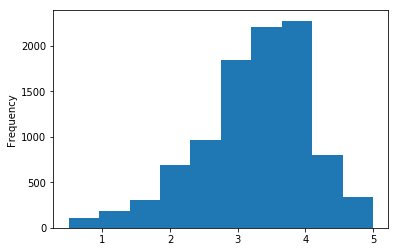

In [17]:
media_por_filme.plot(kind='hist')

Text(0.5, 1.0, 'histograma das medias dos filmes')

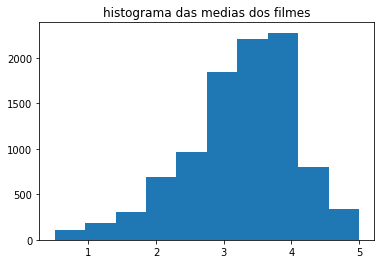

In [18]:
#importando o matplotlib
import matplotlib.pyplot as plt
plt.hist(media_por_filme)
plt.title('histograma das medias dos filmes')

#Fazendo analise sobre os filmes

In [19]:
tmdb = pd.read_csv('tmdb_5000_movies.csv')
tmdb.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [20]:
#Exibindo todas as línguas
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [21]:
contagem_de_lingua = tmdb["original_language"].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27


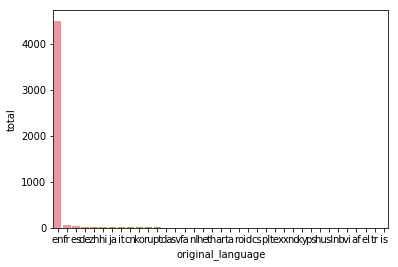

In [22]:
#Como definir nomes para as colunas do gráfico
sns.barplot(x = "original_language", y = "total", data = contagem_de_lingua)

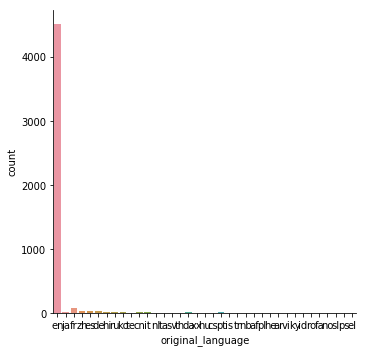

In [23]:
sns.catplot(x = "original_language", kind = "count", data = tmdb)

([<matplotlib.patches.Wedge at 0x7f4761166588>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'de'),
  Text(1.0773191105706255, -0.22222406260195313, 'zh'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ko'),
  Text(1.0960865535188649, -0.09270527058984593, 'ru'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'fa'),
  Text(1.0990363161210686, -0.04603450713357274, 'nl'),
  Text(1.0992355702663055, -0.04100196411527794, 'he'),
  Text

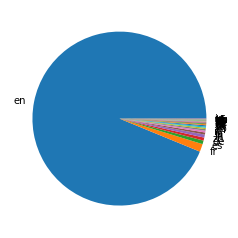

In [24]:
plt.pie(contagem_de_lingua["total"], labels = contagem_de_lingua["original_language"])

In [25]:
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc['en']
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)

4505 298


In [26]:
#Criando tabela com os dados
dados = {
    "lingua" : ["ingles", "outros"],
    "total" : [total_de_ingles, total_do_resto]
}
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


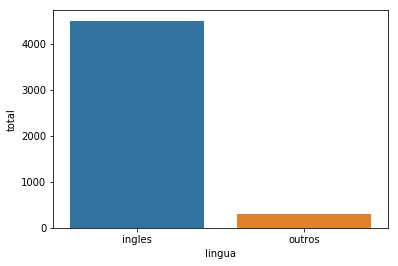

In [27]:
sns.barplot(x = "lingua", y = "total", data = dados)

In [28]:
#Contando o total de filmes de cada língua
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
total_por_lingua_de_outros_filmes

fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
nl     4
fa     4
th     3
he     3
ro     2
ta     2
cs     2
id     2
ar     2
ps     1
sl     1
hu     1
af     1
el     1
pl     1
is     1
nb     1
te     1
tr     1
vi     1
no     1
ky     1
xx     1
Name: original_language, dtype: int64

In [29]:
#Vendo todos os filmes em português
tmdb.query('original_language == "pt"')

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2915,0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 80, ""...",NaN,206563,"[{""id"": 983, ""name"": ""brazilian""}, {""id"": 8029...",pt,Trash,"Set in Brazil, three kids who make a discovery...",14.637357,"[{""name"": ""O2 Filmes"", ""id"": 345}, {""name"": ""W...","[{""iso_3166_1"": ""BR"", ""name"": ""Brazil""}, {""iso...",2014-10-09,0,112.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,You never know what you might find,Trash,7.1,242
3417,4000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",http://www.tropadeeliteofilme.com.br/,7347,"[{""id"": 100, ""name"": ""slum""}, {""id"": 796, ""nam...",pt,Tropa de Elite,"In 1997, before the visit of the pope to Rio d...",23.604936,"[{""name"": ""The Weinstein Company"", ""id"": 308},...","[{""iso_3166_1"": ""BR"", ""name"": ""Brazil""}]",2007-10-12,0,115.0,"[{""iso_639_1"": ""pt"", ""name"": ""Portugu\u00eas""}]",Released,On the streets of Rio only the elite survive,Elite Squad,7.8,504
3797,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,227975,"[{""id"": 74, ""name"": ""germany""}, {""id"": 237, ""n...",pt,Praia do Futuro,Donato fails in his attempt to save a drowning...,2.611364,"[{""name"": ""Cora\u00e7\u00e3o da Selva"", ""id"": ...","[{""iso_3166_1"": ""BR"", ""name"": ""Brazil""}, {""iso...",2014-05-01,0,106.0,"[{""iso_639_1"": ""de"", ""name"": ""Deutsch""}, {""iso...",Released,A hero split in half.,Futuro Beach,6.4,31
3818,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,29262,"[{""id"": 1161, ""name"": ""brazil""}, {""id"": 18034,...",pt,Casa de Areia,A woman is taken along with her mother in 1910...,0.389471,[],"[{""iso_3166_1"": ""BR"", ""name"": ""Brazil""}]",2005-05-13,0,115.0,"[{""iso_639_1"": ""pt"", ""name"": ""Portugu\u00eas""}]",Released,NaN,The House of Sand,6.7,9
3866,3300000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",http://cidadededeus.globo.com/,598,"[{""id"": 255, ""name"": ""male nudity""}, {""id"": 54...",pt,Cidade de Deus,Cidade de Deus is a shantytown that started du...,44.356711,"[{""name"": ""O2 Filmes"", ""id"": 345}, {""name"": ""V...","[{""iso_3166_1"": ""BR"", ""name"": ""Brazil""}, {""iso...",2002-02-05,30641770,130.0,"[{""iso_639_1"": ""pt"", ""name"": ""Portugu\u00eas""}]",Released,"If you run you're dead... if you stay, you're ...",City of God,8.1,1814
3974,2900000,"[{""id"": 18, ""name"": ""Drama""}]",NaN,666,"[{""id"": 983, ""name"": ""brazilian""}, {""id"": 1161...",pt,Central do Brasil,"An emotive journey of a former school teacher,...",5.928937,"[{""name"": ""MACT Productions"", ""id"": 393}, {""na...","[{""iso_3166_1"": ""BR"", ""name"": ""Brazil""}]",1998-01-16,5596708,113.0,"[{""iso_639_1"": ""pt"", ""name"": ""Portugu\u00eas""}]",Released,He was looking for the father he never knew. S...,Central Station,7.6,126
4303,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,310569,"[{""id"": 983, ""name"": ""brazilian""}, {""id"": 1161...",pt,Que Horas Ela Volta?,After leaving her daughter Jessica in a small ...,9.683622,"[{""name"": ""Gullane Entretenimento S.A."", ""id"":...","[{""iso_3166_1"": ""BR"", ""name"": ""Brazil""}]",2015-02-08,0,110.0,"[{""iso_639_1"": ""pt"", ""name"": ""Portugu\u00eas""}]",Released,NaN,The Second Mother,7.8,165
4684,0,"[{""id"": 27, ""name"": ""Horror""}]",NaN,402515,"[{""id"": 321, ""name"": ""terror""}, {""id"": 8087, ""...",pt,Solitude,After finding an old storage locker filled wit...,0.018716,"[{""name"": ""Gravitas Ventures"", ""id"": 44632}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2014-10-21,0,89.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,American Beast,0.0,0
4751,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,42109,[],pt,"Gabriela, Cravo e Canela","In 1925, Gabriela becomes cook, mi

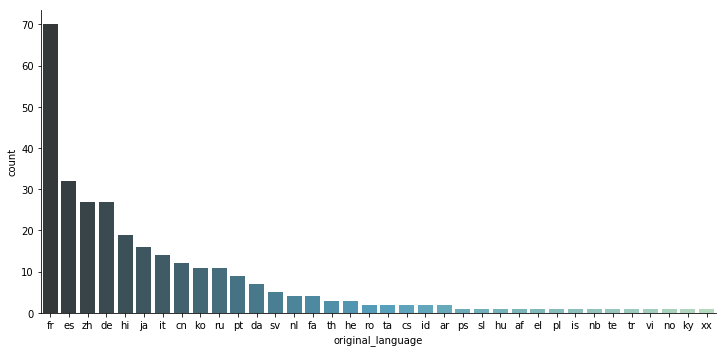

In [30]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")
#definindo tamanho, cor e posição do gráfico
sns.catplot(x = 'original_language', kind = 'count', data = filmes_sem_lingua_original_em_ingles, aspect = 2,palette = "GnBu_d",order = total_por_lingua_de_outros_filmes.index)